# Decision Tree Classification on Heart Disease Dataset

Decision Tree - A supervised machine learning algorithm used for classification and regression tasks.
It works like a flowchart — data is split into branches based on feature values, leading to decisions at the leaves.
Each internal node represents a decision based on a feature, each branch represents an outcome, and each leaf node represents a final prediction.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Dataset
df = pd.read_excel("C:\\Users\\saine\\Downloads\\Excelr_Assignments\\Questions\\Decision Tree\\heart_disease.xlsx")
print("✅ Data Loaded Successfully!")
print(df.head())

✅ Data Loaded Successfully!
        age                                       Age in years
0    Gender                       Gender ; Male - 1, Female -0
1        cp                                    Chest pain type
2  trestbps                             Resting blood pressure
3      chol                                cholesterol measure
4       fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0...


In [3]:
# Exploratory Data Analysis
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

# Correlation for numeric features
numeric_df = df.select_dtypes(include=[np.number])
if not numeric_df.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap (Numeric Features)")
    plt.show()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes
None

Missing Values:
 age             0
Age in years    0
dtype: int64



Target Column: Age in years
Age in years
Gender ; Male - 1, Female -0                                                                                                                                                                                                                                                         1
Chest pain type                                                                                                                                                                                                                                                                      1
Resting blood pressure                                                                                                                                                                                                                                                               1
cholesterol measure                                                                                                      

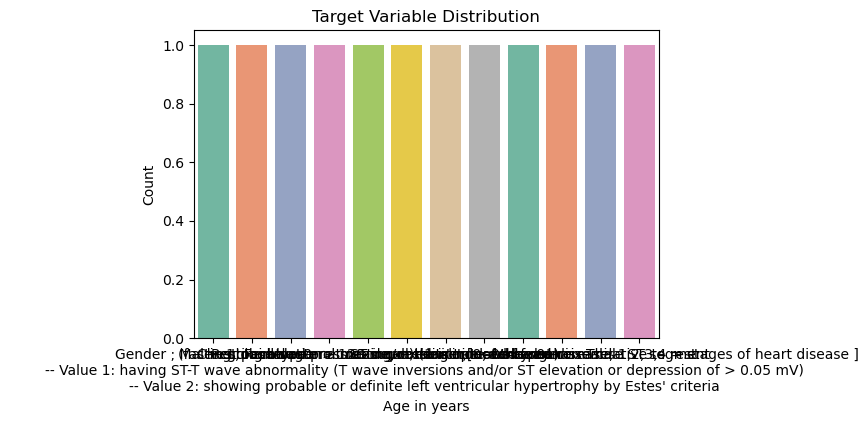

In [4]:
# Target Variable
target_col = 'target' if 'target' in df.columns else df.columns[-1]
print(f"\nTarget Column: {target_col}")
print(df[target_col].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x=df[target_col], palette='Set2')
plt.title("Target Variable Distribution")
plt.xlabel(target_col)
plt.ylabel("Count")
plt.show()

In [5]:
# Encode 
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df.fillna(df.median(), inplace=True)

X = df.drop(columns=[target_col])
y = df[target_col]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [7]:
# Train Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)


--- Decision Tree Performance ---
Accuracy : 0.0
Precision: 0.0
Recall   : 0.0
F1-Score : 0.0


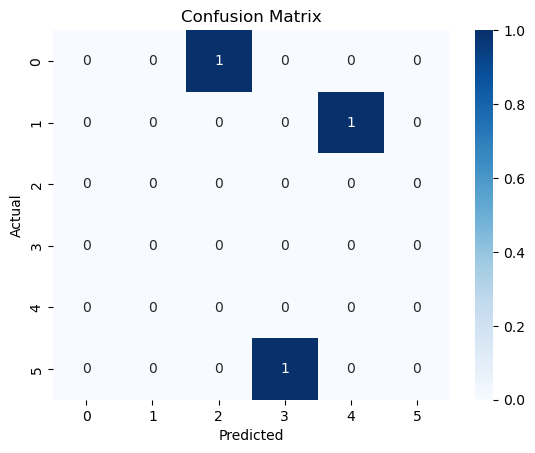


Classification Report:
               precision    recall  f1-score   support

           2       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



In [8]:
# Evaluation
print("\n--- Decision Tree Performance ---")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score :", f1_score(y_test, y_pred, average='weighted'))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [9]:
# ROC-AUC Handling (Binary + Multiclass)
classes = np.unique(y_train)
n_classes = len(classes)

if n_classes == 2:
    if len(np.unique(y_test)) > 1:
        y_prob = dt_model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label="ROC Curve")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title("ROC-AUC Curve (Binary)")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.show()
        print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
    else:
        print("⚠️ ROC-AUC skipped: only one class present in test data.")
else:
    y_test_bin = label_binarize(y_test, classes=classes)
    y_score = dt_model.predict_proba(X_test)
    if y_score.shape[1] != len(classes):
        aligned = np.zeros((y_score.shape[0], len(classes)))
        for i, c in enumerate(dt_model.classes_):
            aligned[:, list(classes).index(c)] = y_score[:, i]
        y_score = aligned
    try:
        auc_score = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
        print("Multiclass ROC-AUC:", auc_score)
    except ValueError:
        print("⚠️ ROC-AUC skipped due to missing class in test set.")

⚠️ ROC-AUC skipped due to missing class in test set.


In [10]:
# Auto CV-fold detection for GridSearch
class_counts = Counter(y_train)
min_class_count = min(class_counts.values())

if min_class_count <= 1:
    print("⚠️ Only one sample in a class → Using LeaveOneOut CV.")
    cv_method = LeaveOneOut()
else:
    safe_cv = min(5, min_class_count)
    print(f"Using {safe_cv}-fold cross-validation.")
    cv_method = safe_cv


⚠️ Only one sample in a class → Using LeaveOneOut CV.


In [11]:
# GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=cv_method,
    scoring='accuracy'
)
grid_search.fit(X_train, y_train)

print("\nBest Parameters:", grid_search.best_params_)
best_dt = grid_search.best_estimator_



Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


In [12]:
# Evaluate Tuned Model
best_pred = best_dt.predict(X_test)
print("\n--- Tuned Decision Tree ---")
print("Accuracy :", accuracy_score(y_test, best_pred))
print("Precision:", precision_score(y_test, best_pred, average='weighted'))
print("Recall   :", recall_score(y_test, best_pred, average='weighted'))
print("F1-Score :", f1_score(y_test, best_pred, average='weighted'))


--- Tuned Decision Tree ---
Accuracy : 0.0
Precision: 0.0
Recall   : 0.0
F1-Score : 0.0


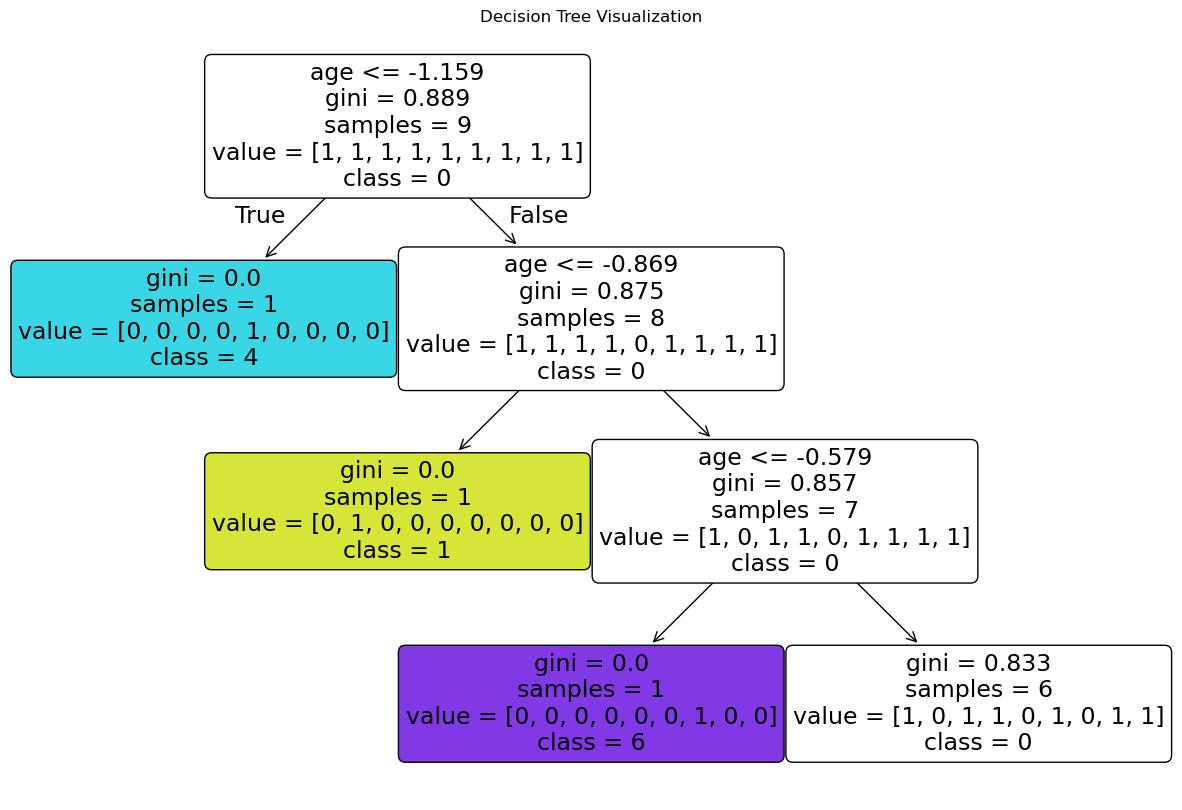

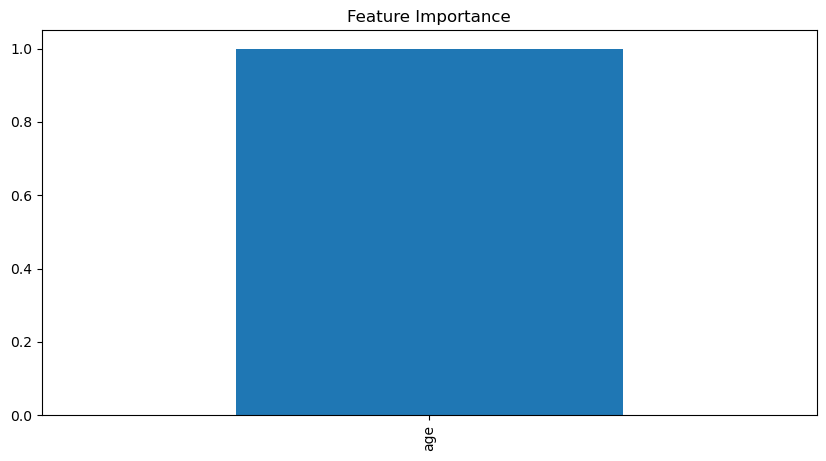

In [13]:
# Feature Importance + Visualization
plt.figure(figsize=(15, 10))
plot_tree(best_dt, filled=True, feature_names=X.columns, class_names=[str(c) for c in np.unique(y)], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

feat_imp = pd.Series(best_dt.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
feat_imp.plot(kind='bar')
plt.title("Feature Importance")
plt.show()

Interview Questions & Answers

Q1. What are some common hyperparameters of Decision Tree models, and how do they affect the model's performance?

Some common hyperparameters of a Decision Tree model include max_depth, min_samples_split, min_samples_leaf, criterion, max_features, and splitter. The max_depth parameter controls how deep the tree can grow; limiting it helps prevent overfitting. min_samples_split specifies the minimum number of samples required to split a node, while min_samples_leaf ensures that each leaf node has a minimum number of samples, both helping to make the model more general and stable. The criterion parameter determines the measure used to evaluate the quality of a split, such as “gini” or “entropy.” max_features defines the number of features to consider when searching for the best split, which helps control model variance. Lastly, the splitter** parameter decides how splits are made, either choosing the “best” or a “random” feature at each node. Tuning these hyperparameters allows a balance between model complexity and accuracy, improving performance and reducing overfitting.

Q2. What is the difference between Label Encoding and One-Hot Encoding?

The main difference between Label Encoding and One-Hot Encoding lies in how they convert categorical data into numerical form.Label Encoding assigns each unique category in a feature a numeric value, such as converting Red, Blue, and Green into 0, 1, and 2. It is useful for ordinal data, where there is a meaningful order or ranking among categories (like Low, Medium, High). However, it can mislead the model into assuming a numeric relationship between categories that don’t actually exist. On the other hand, One-Hot Encoding creates separate binary columns for each category, representing the presence or absence of that category (for example, Red, Blue, and Green become [1,0,0], [0,1,0], and [0,0,1] ). It is ideal for nominal data, where categories are independent and have no order. Although One-Hot Encoding avoids ordinal confusion, it increases the number of features, leading to higher dimensionality in the dataset.
